In [1]:
# Setting up everything
import torch
import hashlib
from scipy.optimize import brute
import numpy as np
import numpy.random as rand
import json
from datetime import datetime
from datetime import date
from sklearn import preprocessing
import csv
from dateutil import parser

import importlib
import tickstore
from tickstore.query import QuerySettings, QueryFunctor, TickSampler
from matplotlib import pyplot as plt
#c = tickstore.Client("127.0.0.1:4501")

import perpx
import utils

In [2]:
FROM_TRAIN = 1616000000000
TO_TRAIN   = 1619000000000
importlib.reload(perpx)
qs = QuerySettings(
    streaming=False,
    batch_size=1000,
    timeout=1000000,
    selector='SELECT Trade(trade) WHERE type="^CRSPOT$" base="^ETH$" quote="^USD$" exchange="^coinbasepro$"',
    frm=FROM_TRAIN-1,
    to=TO_TRAIN,
)

ex = perpx.Instrument(0.01)
dur = (TO_TRAIN - FROM_TRAIN) / (1000 * 60 * 60 * 24)
print(dur)
prices = []
ex.provide(100000000)
x = []
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
q = c.new_query(qs)
lastTick = 0
tot = 0
vol = 0
vol2 = 0
start = None
end = None
while q.next():
    tick, trade, _ = q.read()
    if start is None:
        start = tick
    end = tick
    size = rand.normal(0, np.abs(trade.size()))
    tot += size
    vol += np.abs(size)
    vol2 += np.abs(trade.size())
    ex.trade(1, size)
    if tick - lastTick > 1000:
        lastTick = tick
        ex.update_price(trade.price())
        ex.capture(datetime.fromtimestamp(tick/1000))
print(utils.sharpe(np.square(np.array(ex.y1)), 1000))

34.72222222222222


NameError: name 'c' is not defined

In [3]:
print(vol2 * 2300)

NameError: name 'vol2' is not defined

ValueError: zero-size array to reduction operation minimum which has no identity

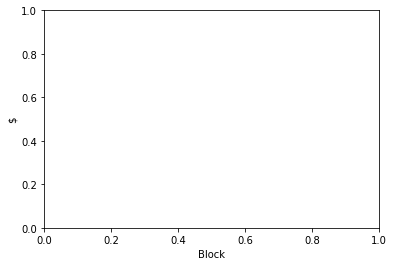

In [4]:
ex.plot()

In [5]:
print(utils.sharpe(np.square(np.array(ex.y1)), 1000))

nan


/home/loracle/.local/share/virtualenvs/loracle-kszUIQM7/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/loracle/.local/share/virtualenvs/loracle-kszUIQM7/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/loracle/.local/share/virtualenvs/loracle-kszUIQM7/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/loracle/.local/share/virtualenvs/loracle-kszUIQM7/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/loracle/.local/share/virtualenvs/loracle-kszUIQM7/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarni

In [7]:
importlib.reload(perpx)
ex = perpx.Instrument(0.01)

rand.normal(0, 1)
price = 100.
ex.provide(10000)
x = []
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
dailyVolume = 1000000
secondVolume = dailyVolume / (60. * 60. * 24.)
tot = 0
for i in range(30000):
    size = rand.normal(0, secondVolume)
    tot += np.abs(size)
    pricechng = np.exp(rand.normal(0, 0.01))
    price *= (pricechng - (0.001 * ((price / 100.) - 1.)))
    #print((0.001 * (ex.imbalance())) + 1.)
    bef = size
    if size < 0:
        size *= ((ex.imbalance())) + 1.
    else:
        size /= ((ex.imbalance())) + 1.
    #print(size/price)
    #print(price)
    #print(size)
    ex.trade(1, size/price)
    ex.update_price(price)
    x.append(i)
    y1.append(ex.pool())
    y2.append(ex.pnl())
    y3.append(ex.oi)
    y4.append(ex.imbalance())
    y5.append(price)

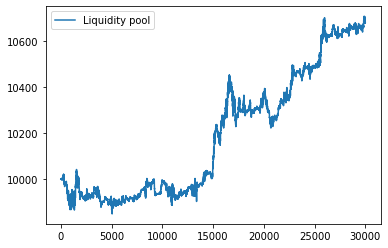

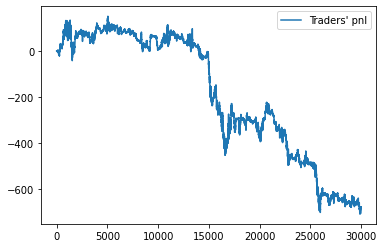

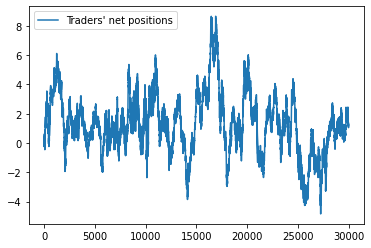

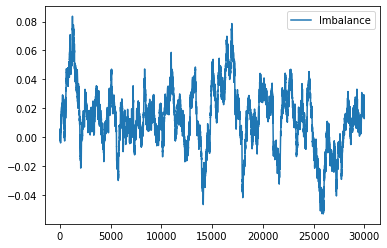

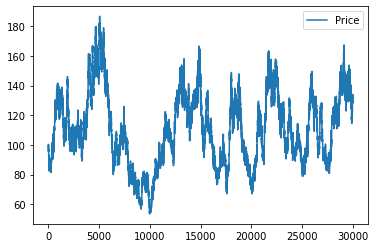

In [8]:
plt.plot(x, y1, label="Liquidity pool")
plt.legend()
plt.show()
plt.plot(x, y2, label="Traders' pnl")
plt.legend()
plt.show()
plt.plot(x, y3, label="Traders' net positions")
plt.legend()
plt.show()
plt.plot(x, y4, label="Imbalance")
plt.legend()
plt.show()
plt.plot(x, y5, label="Price")
plt.legend()
plt.show()

In [9]:
with open("data.json") as f:
    pika = json.load(f)

In [10]:
print(pika[-1])

{'open-position': None, 'close-position': {'position-id': 109945779719214196280518666201040821547967767029168157989879288324735625787591, 'user': '0xc573a808275e2c7cf9399ed2484677df345145e5', 'product-id': 1, 'price': 182236607125, 'entry-price': 299703868324, 'oracle-price': None, 'margin': 5992000000, 'leverage': 100000000, 'fee': 289403881, 'pnl': -2348531011, 'was-liquidated': False}, 'add-margin': None, 'position-liquidated': None, 'staked': None, 'redeemed': None, 'block-number': 19709025}


In [11]:
productToPair = {1: "ETH-USD", 2:"BTC-USD", 3:"LINK-USD", 4:"SNX-USD", 5: "SOL-USD", 6: "AVAX-USD", 8: "LUNA-USD", 9: "AAVE-USD"}

3.884902072481774e-09 2574.06745741
8.704704905995441e-09 2527.3688468
1.1114899219571507e-08 2519.14114621
6.762004795879291e-09 2514.04731188
4.1428893432609697e-10 2413.77434236
1.657067606337871e-09 2413.90271266
2.692509645329364e-09 2414.10462216
3.72777849548389e-09 2414.30653294
1.0014015442573093e-08 2408.93983361
4.221685659730999e-09 2368.72207123
4.1647985058636093e-10 2401.0765433
2.6880394034612868e-09 2406.15278618
4.127076354095153e-09 2423.02277487
2.4709157414118195e-09 2420.15536984
2.4659792661191263e-09 2433.11048168
2.0432747524795575e-08 2447.05221064
4.0865830983769696e-08 2447.03209485
4.2016667676942503e-10 2499.00826994
4.862132236981794e-09 2498.90365128
4.404874129654818e-08 2459.77516748
5.1223419233808966e-08 2440.29004408
4.071659553251925e-08 2456.0010161
1.6994452238718278e-08 2468.92578005
6.092729470365045e-08 2461.9507682
4.176102037805411e-09 2490.36060562
2.87873602322339e-08 2570.57261947
4.8173474954769e-08 2574.03062795
7.35864201186934e-10 262

2.5909626557275637e-08 2701.69853067
4.605524564632992e-08 2714.1316531
5.688078778689073e-10 2733.29284015
1.8766727009092157e-10 2740.52582398
2.2485018798530913e-10 2743.79579367
5.631250368443554e-10 2738.77060882
3.644250989618921e-10 2748.48796873
1.994531876145918e-10 2740.03642928
5.474368933139709e-10 2740.04185381
1.1031788801597807e-07 2719.41391732
2.2063794716023178e-07 2719.38715766
3.3096017749685566e-07 2719.360398
4.412845790899466e-07 2719.33363834
1.9068984541403385e-10 2679.6864767
2.0000247001661798e-10 2685.73658643
2.0000246401670027e-10 2685.736667
9.999597516227961e-09 2679.69785349
3.873350586074903e-10 2685.01385787
2.0000474211269283e-10 2684.97583771
9.986641066627601e-10 2679.32829682
3.2380160848578455e-09 2679.34091567
1.9781407199287026e-10 2679.28360536
4.478912149727595e-09 2679.22200723
7.47885067052117e-10 2674.20769328
7.524699180550862e-08 2657.91356174
2.2710595751958587e-09 2624.27814087
1.5053832241083978e-07 2626.32460405
2.8722137491808328e-0

5.549299232843203e-10 2612.94253411
8.000915304723079e-10 2618.99035322
3.962985478990271e-10 2624.28415525
4.191535457919561e-09 2624.3366208
3.8104943638804376e-09 2624.33139786
4.112436530725639e-09 2624.33533475
3.4365583008321663e-09 2618.89926262
3.79435454039082e-09 2618.90379376
3.4365560324867186e-09 2618.90099126
4.190932807639641e-09 2624.8507205
3.811565562025005e-10 2629.35789426
3.803491347386387e-10 2629.35789426
3.787832596599706e-10 2634.63332803
3.7802621893297336e-10 2634.31463249
9.488957903773986e-10 2634.64125919
1.037433477937703e-09 2635.17667218
1.0321888580433692e-09 2635.17667218
3.759159390620476e-10 2641.83530626
3.7516367975282456e-10 2641.71361325
1.934632137510016e-10 2636.16007463
1.934464723570718e-10 2636.38821523
1.6721190408531487e-08 2634.73729584
4.758464644474751e-09 2647.91291759
6.219455336483409e-10 2652.96542982
1.5405642651336435e-08 2653.41525664
6.218847990905088e-10 2653.22452392
1.4865176314827956e-08 2652.76530636
2.1172565907824433e-08

1.9554344693506855e-09 2633.68580268
1.989608284390262e-09 2633.68424886
1.9554344693506855e-09 2633.68580268
1.936449475038739e-09 2633.68606604
1.947718567440166e-09 2633.85074505
1.9818870869249173e-09 2633.85337865
1.9818870869249173e-09 2633.85337865
2.0503594978635734e-09 2633.68448588
2.02143176327003e-09 2636.74495318
1.998676194018334e-09 2636.74526958
2.0328095499438187e-09 2636.74479498
1.967726173691563e-09 2642.64411864
1.979078321347511e-09 2642.64427718
2.0244851776897474e-09 2642.64715739
1.9979985644088335e-09 2642.64454142
2.0093490006439928e-09 2642.646946
2.005695193192854e-09 2642.47529634
1.971511898681886e-09 2642.64192546
2.0170483058688324e-09 2642.4751378
2.017049173173788e-09 2642.47400157
2.035970163361268e-09 2642.47487356
1.8959493227659312e-09 2642.4756927
1.9148703408060725e-09 2642.47656469
2.0509752248528194e-09 2642.64528129
1.9374537732881126e-09 2642.64369586
1.9298856716774352e-09 2642.64359016
1.9867733417552104e-09 2642.47556058
1.899614854691531

1.655380285411654e-09 3026.49490522
1.6586844045096812e-09 3026.49496574
1.6718992415032028e-09 3026.49817309
1.6619885234755654e-09 3026.49502626
1.6652910107011304e-09 3026.49805206
1.685114050487745e-09 3026.50138044
1.6818082575027983e-09 3026.50434572
1.6787267132485334e-09 3026.10303387
1.6655090754632134e-09 3026.10179329
1.7016396080139535e-09 3026.49278716
1.7448198688711235e-09 3026.1003409
1.682033025716583e-09 3026.09991729
1.6818166309982153e-09 3026.48927724
1.718160295018943e-09 3026.49293845
8.393974663234309e-09 3025.98006535
1.7514325725802773e-09 3026.09422879
1.728301965024457e-09 3026.09156608
1.6686067703574938e-09 3026.47699249
1.6818199602466687e-09 3026.48328615
1.6851240746523878e-09 3026.48337693
1.7844788270371958e-09 3026.09362363
1.7016464470634277e-09 3026.48062345
1.6779838722547414e-09 3033.40221808
1.664798057668283e-09 3033.40094418
1.8131489194682631e-09 3033.39672817
1.681280534308614e-09 3033.40215742
1.697763846561309e-09 3033.40185411
1.677984727

1.5247834570652845e-09 3311.94569078
1.5253539349888895e-09 3317.26288826
1.5374129297546001e-09 3317.26103072
1.552485015629264e-09 3317.2622912
1.5312381867116837e-09 3317.57661485
1.5131514557306694e-09 3317.57933483
1.5252083174417151e-09 3317.5796002
1.561378891011267e-09 3317.58039629
1.5826299284575053e-09 3317.2631868
1.5101372400003896e-09 3317.57926849
1.5131514557306694e-09 3317.57933483
1.5977020033303418e-09 3317.26441411
1.5161656713358312e-09 3317.57940118
1.6278484310162252e-09 3317.26215851
1.5193255820877682e-09 3317.26132925
1.5223393710715683e-09 3317.26295461
1.5253539349888895e-09 3317.26288826
1.5221955328304254e-09 3317.57641583
1.5372666220251502e-09 3317.57674754
1.5523377082107694e-09 3317.57707924
1.5223393710715683e-09 3317.26295461
1.537412191845548e-09 3317.2626229
3.0898979526252442e-09 3317.26165626
1.5072665533165482e-09 3317.26328631
1.8085474119862236e-09 3317.5796002
1.8087234811942335e-09 3317.25665221
1.5131528778642371e-09 3317.57621681
1.5312381

1.3229868074348143e-09 3270.68170694
4.697019787919362e-09 3270.75394477
1.5990178512600952e-09 3270.68768862
3.098066713429198e-09 3270.71975438
1.2091458816453108e-08 3270.91208351
1.5275823275639472e-10 3273.14600973
1.2374844546596256e-09 3280.84929448
6.5285651525917335e-09 3280.9659549
4.6741987982369066e-09 3280.93851117
1.5213381558831917e-09 3286.58029161
5.433194752971754e-09 3294.63422135
1.6660874275530998e-10 3294.53031049
1.6622425060172448e-10 3294.53024464
1.6589240935799231e-10 3293.50262688
3.2979091915240296e-09 3287.94534794
1.5831806881836984e-09 3280.67890593
3.2604416586644544e-09 3280.71802008
1.042416592817391e-08 3279.41882694
6.684805122617136e-10 3280.6423819
1.0027213696600117e-09 3280.64041471
3.354041142539874e-10 3279.62584015
6.594759631375981e-09 3280.7692652
1.5472543073674017e-09 3278.33228568
3.0806211524151925e-09 3278.33171472
1.5293551527388087e-09 3278.33271168
1.5168728586730704e-09 3286.0258996
9.132587154626246e-10 3284.97825885
6.85295334179

3.6507580993607493e-07 3034.51466339
2.3207523581460166e-09 3029.16315277
8.260893702972683e-09 3026.30694679
5.552698970607319e-10 3039.31090274
7.353093641368183e-10 3039.30759079
4.898545294786562e-10 3069.7636186
3.3567505295416692e-09 3063.07514053
1.6317018216651945e-08 3064.28535754
1.6990827597507276e-10 3060.47481805
6.985063295568888e-10 3036.42626452
2.5696163869033943e-08 3035.47254748
1.6783087714878325e-09 3032.81498999
2.196349733545517e-09 3032.30396247
9.890540553134646e-10 3033.20125314
3.6988450726233054e-09 3033.72695522
2.307805671504403e-09 3033.18433022
2.94909058894345e-09 3033.71521836
2.6991724337379123e-09 3035.90845845
3.3489599804741175e-09 3035.92044661
4.839097311666785e-10 3032.34504721
8.226693750103662e-10 3038.88788855
8.225422771328342e-10 3039.3574525
2.723075610225017e-09 3039.53212093
4.934903701557932e-09 3039.5729901
2.7632758809814877e-09 3038.56903894
2.3490682052376935e-09 3040.01755278
3.820914396196621e-09 3044.38958789
3.709523062108337e-0

6.477229409245414e-10 3087.73994811
6.479495479396906e-10 3086.66007463
3.562412095750124e-09 3087.79548922
9.715824695591372e-10 3087.74611934
8.419994350155746e-09 3087.88805773
6.477192126278204e-10 3087.75772126
3.2386025358493763e-10 3087.75155003
6.477192126278204e-10 3087.75772126
1.619878549714591e-09 3086.6511572
3.237497200044719e-08 3088.80576016
1.6190347041339148e-10 3088.25992873
1.6481140212066026e-10 3088.26029905
3.2645473783657916e-09 3093.8439022
6.464554903354994e-10 3093.7938186
9.696812975283991e-10 3093.80000176
3.226416883879783e-10 3099.41348558
3.257450107238341e-09 3100.5847112
6.450499255512547e-10 3100.53520011
6.452846668878903e-10 3099.40728895
6.450499255512547e-10 3100.53520011
1.95664066216306e-09 3252.0174946
5.6440092459153346e-09 3100.63276609
5.6464035073634495e-09 3099.31799546
9.672374008394e-10 3101.61703569
9.672374008394e-10 3101.61703569
9.675931614400598e-10 3100.47664613
6.448257908957149e-10 3101.6129135
3.224135398127921e-10 3101.60671472

1.7646747576019236e-10 2980.80683556
3.0176402221929258e-09 2982.46289727
3.4977273574024828e-09 2981.53298825
3.018591742029564e-09 2981.52276596
1.6773673953539885e-10 2980.86156548
9.89098203437884e-09 2980.68891901
3.019319301061258e-09 2980.80431468
8.422565400273325e-10 2968.21678573
8.4243921338332e-09 2967.5731617
1.7225685892364155e-10 2960.69487849
5.106884399806749e-10 2937.21158062
3.0774475019976523e-09 2943.57297498
2.401415076434517e-10 2922.25009698
1.0447417171528578e-09 2928.75736066
1.7069174617628733e-10 2929.25704494
3.908198031764562e-09 2913.82538895
3.438901529307901e-10 2907.90530487
3.8012140634001075e-09 2894.3871133
8.636706812826324e-09 2894.62182077
4.820315126890901e-09 2904.37443019
4.819282732229776e-09 2904.99661005
5.151745769901726e-10 2901.41795376
5.141462771425323e-10 2900.94096818
5.129516883105037e-10 2901.41792476
5.119278339126915e-10 2900.94099719
5.107380960773133e-10 2901.41789575
5.097186836507967e-10 2900.94105519
5.085341446017687e-10 29

1.7891783157556171e-09 2794.57891702
1.8244525128915197e-09 2795.35913594
1.789178423084084e-09 2794.57874938
1.8959988933053603e-09 2795.36028144
1.8607462483076857e-09 2794.57771565
1.8963314403439194e-09 2794.87007769
1.8605500398175342e-09 2794.87242413
1.8247687358426666e-09 2794.87471471
1.8610707516228e-09 2794.09044254
1.7894913041288598e-09 2794.09013526
1.8247705596438577e-09 2794.87192132
1.8252814769253383e-09 2794.08960452
1.8247705596438577e-09 2794.87192132
2.1116035176891055e-09 2794.0851351
1.7894923238824202e-09 2794.08854303
1.8247726205431338e-09 2794.86876479
1.7889913526817603e-09 2794.87097157
1.7894914293571962e-09 2794.08993973
1.8252825170743647e-09 2794.08801229
1.8605521039330327e-09 2794.86932347
1.8610727238697436e-09 2794.08748154
1.8247726205431338e-09 2794.86876479
1.7894923059880642e-09 2794.08857097
1.7889930870866142e-09 2794.86826198
1.7889913526817603e-09 2794.87097157
1.7894914293571962e-09 2794.08993973
1.8252825170743647e-09 2794.08801229
1.8247

8.008802153104233e-09 2563.48558731
1.9505374721835163e-10 2563.39602356
2.9200520424228662e-09 2563.43102902
6.853862527783777e-09 2563.48748366
3.8101457968702406e-09 2563.45867975
8.360907020983089e-09 2563.52469298
1.436506884781951e-08 2563.61722938
3.4542611595557228e-09 2563.49734976
8.345370836411263e-09 2552.69864393
4.646614803254371e-09 2552.66335307
3.999397290835246e-09 2557.66318176
4.051944297351934e-09 2558.19972421
3.9903910316988674e-09 2563.43579332
3.901107157511835e-10 2563.37485648
3.9017650110737436e-10 2562.94266098
3.9010706945917946e-09 2563.39881609
4.2132561703042285e-10 2563.33808424
3.901864024253088e-09 2562.87762409
4.2919794041904303e-10 2562.92003388
4.213217069032195e-09 2563.36187361
9.869513076759534e-10 2562.88986126
4.0970042296679385e-09 2562.84822065
4.291251833294871e-09 2563.35457049
4.222181505350772e-09 2557.91940406
4.2221783819792586e-09 2557.92129629
8.610476770665395e-09 2555.02692661
8.035036126916841e-10 2555.12883523
9.848232905065696

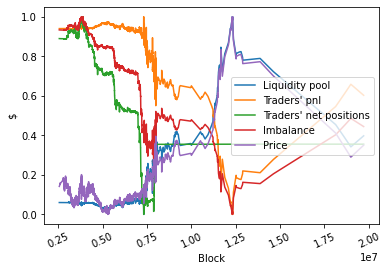

In [12]:
importlib.reload(perpx)
instrument = perpx.Instrument(0.01)
size = {}
tot = 0.
pl = 0.
product = 1
instrument.provide(5000000)
mx = 0
totpnl = 0.
xs = []
pnls = []
for p in pika:
    if p['staked']:
        amount = p['staked']['amount'] / 1e8
        #instrument.provide(amount)
        pl += amount
        if pl > mx:
            mx = pl
    if p['redeemed']:
        amount = p['redeemed']['amount'] / 1e8
        #instrument.redeem(amount)
        pl += amount
    if p['open-position']:
        productID = p['open-position']['product-id']
        if productID != product:
            continue
        user = p['open-position']['user']
        price = p['open-position']['price']
        margin = p['open-position']['margin']
        leverage = p['open-position']['leverage']
        positionID = p['open-position']['position-id']
        fee = p['open-position']['fee']
        
        #print(positionID)
        long = p['open-position']['is-long']
        notional = (margin / 1e8) * (leverage / 1e8)
        print(notional/price, price / 1e8)
        # in pika, long is short
        if long:
            notional *= -1
            
        size[positionID] = notional
        instrument.trade(user, notional)
        # OI is in notional, traders are longing USD/ETH or shorting USD/ETH, with USD as collateral
        # 
        instrument.update_price(1e8/price)
        #instruments[productID].costs[user] += fee
        instrument.capture(p['block-number'])
        tot += abs(notional)
        
        #print(instruments[productID].pool())
    if p['close-position']:
        productID = p['close-position']['product-id']
        if productID != product:
            continue
        user = p['close-position']['user']
        price = p['close-position']['price']
        margin = p['close-position']['margin']
        leverage = p['close-position']['leverage']
        positionID = p['close-position']['position-id']
        notional = (margin / 1e8) * (leverage / 1e8)
        pnl = p['close-position']['pnl']
        totpnl += (pnl / 1e8)
        if size[positionID] > 0:
            notional *= -1
        size[positionID] += notional
        
        #print(size[positionID]*-1, notional/price)
        #print(instruments[productID].pos[user])
        #print(notional/price)
        #print(p['close-position'])
        #print(notional)
        
        xs.append(p['block-number'])
        pnls.append(totpnl)
        instrument.trade(user, notional)
        instrument.update_price(1e8/price)
        instrument.capture(p['block-number'])
        tot -= abs(notional)
print("MAX", mx)
instrument.plot()
#plt.plot(xs, pnls)
#plt.plot(instrument.x, instrument.y2)
#plt.plot(instrument.x[:1000], instrument.y1[:1000], label="Liquidity pool")
#plt.legend()
#plt.show()

9997261.818871459


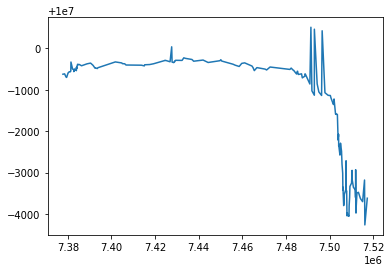

In [254]:
plt.plot(instrument.x[800:1000], instrument.y1[800:1000], label="Liquidity pool")
print(instrument.y1[1000])

128610


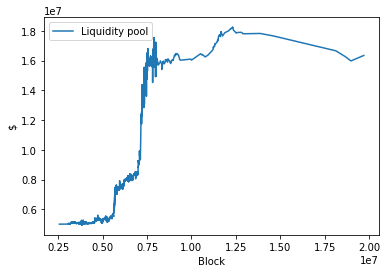

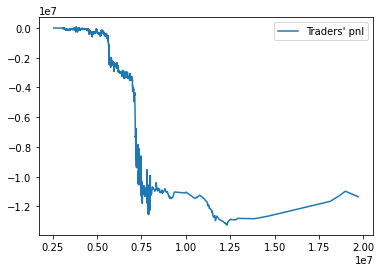

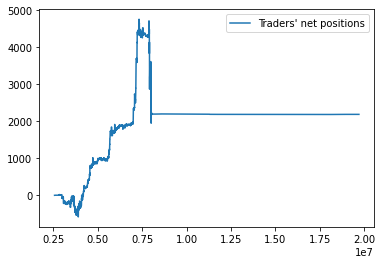

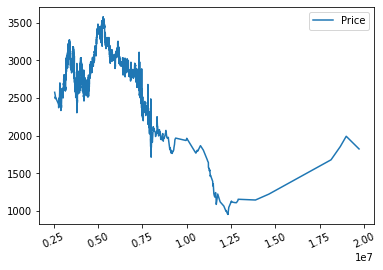

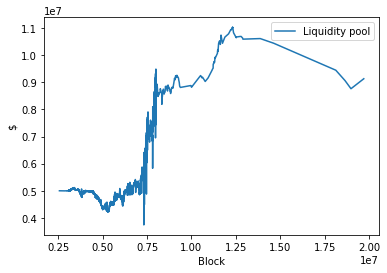

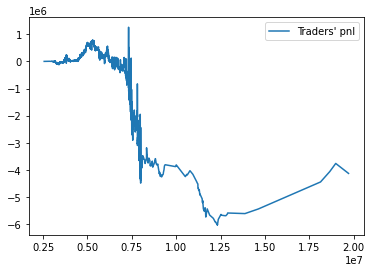

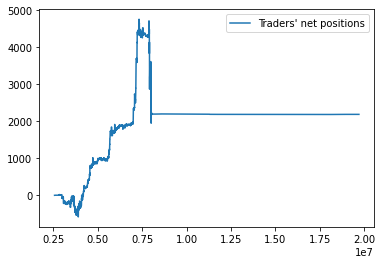

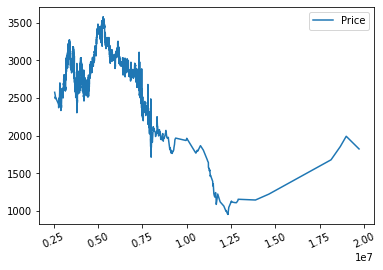

In [37]:
importlib.reload(perpx)
instrument1 = perpx.Instrument(0.01)
instrument2 = perpx.Instrument(0, True)
size = {}
tot = 0.
pl = 0.
instrument1.provide(5000000)
instrument2.provide(5000000)
print(len(pika))
for p in pika:
    if p['staked']:
        amount = p['staked']['amount'] / 1e8
        #instrument.provide(amount)
        pl += amount
    if p['redeemed']:
        amount = p['redeemed']['amount'] / 1e8
        #instrument.redeem(amount)
        pl += amount
    if p['open-position']:
        productID = p['open-position']['product-id']
        if productID != 1:
            continue
        user = p['open-position']['user']
        price = p['open-position']['price']
        margin = p['open-position']['margin']
        leverage = p['open-position']['leverage']
        positionID = p['open-position']['position-id']
        fee = p['open-position']['fee']
        
        #print(positionID)
        long = p['open-position']['is-long']
        notional = (margin / 1e8) * (leverage / 1e8)
        # in pika, long is short
        if not long:
            notional *= -1
        amount = notional / (price / 1e8)
        size[positionID] = amount
        instrument1.trade(user, amount)
        instrument1.update_price(price/1e8)
        #instruments[productID].costs[user] += fee
        instrument1.capture(p['block-number'])
        instrument2.trade(user, amount)
        instrument2.update_price(price/1e8)
        #instruments[productID].costs[user] += fee
        instrument2.capture(p['block-number'])
        tot += abs(notional)
        
        #print(instruments[productID].pool())
    if p['close-position']:
        productID = p['close-position']['product-id']
        if productID != 1:
            continue
        user = p['close-position']['user']
        price = p['close-position']['price']
        margin = p['close-position']['margin']
        leverage = p['close-position']['leverage']
        positionID = p['close-position']['position-id']
        notional = (margin / 1e8) * (leverage / 1e8)
        if size[positionID] > 0:
            notional *= -1
        amount = notional / (price / 1e8)
        size[positionID] += amount
        
        #print(size[positionID]*-1, notional/price)
        #print(instruments[productID].pos[user])
        #print(notional/price)
        #print(p['close-position'])
        #print(notional)
        
        instrument1.trade(user, amount)
        instrument1.update_price(price/1e8)
        instrument1.capture(p['block-number'])
        instrument2.trade(user, amount)
        instrument2.update_price(price/1e8)
        instrument2.capture(p['block-number'])
        tot -= abs(notional)

instrument1.plot()
instrument2.plot()

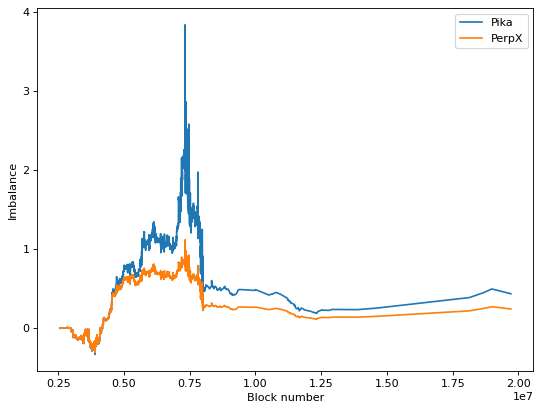

In [35]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(instrument2.x, instrument2.y4, label="Pika")
plt.plot(instrument1.x, instrument1.y4, label="PerpX")
plt.ylabel("Imbalance")
plt.xlabel("Block number")
plt.legend()

[[-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 ...
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]]
(40, 40) (40, 40) (40, 40)


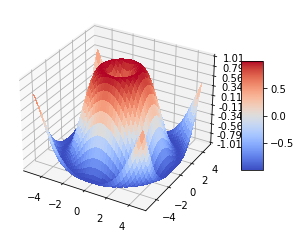

In [7]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
print(X)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
print(X.shape, Y.shape, Z.shape)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()